In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Custom code for calculating the rubisco rate law. 
import rubiscos

In [2]:
# CO2 can vary from 10 uM to 1000 uM in this calculation, with higher values due to the CCM. 
# Henry's law gives ~15 uM at 25 C under present-day atmosphere (400 ppm).
co2_concs = np.logspace(1, 3, 200) # uM

# 270 uM is approximately Henry's law at 25 C under present-day 21% O2. 
o2_conc = 270 # uM

# Calculate rates for PCC7942 Form I rubisco as a function of CO2 at fixed O2. 
vc_7942, vo_7942 = rubiscos.PCC7942.vs(co2_concs, o2_conc)
net_vc_7942 = vc_7942 - vo_7942/2

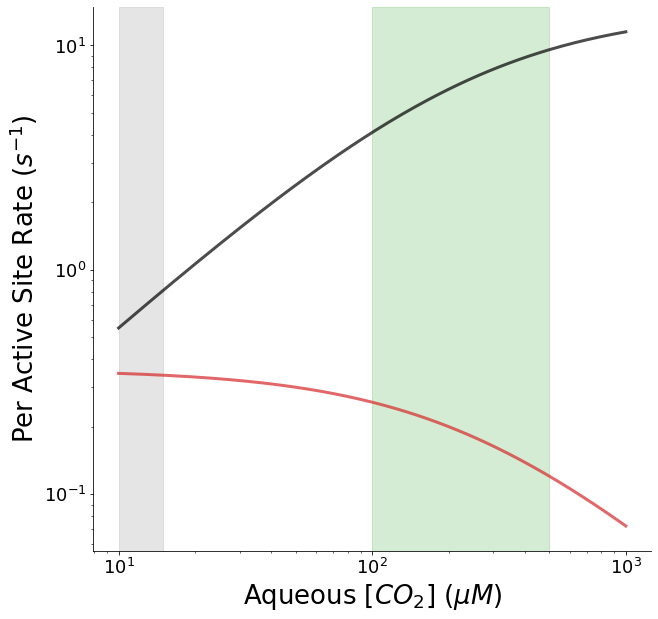

In [3]:
# Comparison of 7942 and Rubrum. Might be better to compare spinach and Rubrum for the paper w/ Rey and Patrick.  
# Should think on this...
fig = plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')

colors = sns.color_palette()
plt.plot(co2_concs, vc_7942, c='k', lw=3, alpha=0.7)
plt.plot(co2_concs, vo_7942, c=colors[3], lw=3, alpha=0.7)

plt.axvspan(10, 15, color='grey', alpha=0.2)
plt.axvspan(100, 500, color=colors[2], alpha=0.2)

plt.xlabel('Aqueous [$CO_2$] ($\mu M$)', fontsize=26)
plt.ylabel('Per Active Site Rate ($s^{-1}$)', fontsize=26)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.despine()
#plt.savefig('Fig1_ccm_action.png', dpi=600)

plt.show()